In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from __future__ import division
import csv
import math
import powerlaw
from numpy import genfromtxt
import random
import pandas as pd

In [2]:
#importing data
edges = genfromtxt('/Users/maedehrahimitouranposhti/Downloads/cnproj_edges.csv', delimiter=',',dtype=str)
nodes = genfromtxt('/Users/maedehrahimitouranposhti/Downloads/cnproj_nodes.csv', delimiter=',',dtype=str)

NameError: name 'genfromtxt' is not defined

In [3]:
#filtering data
nodes=nodes[1:]
Id=edges[1:,3]
array=edges[1:,0:3]
source=array[:,0]
target=array[:,1]
weight=array[:,2]
#comment

In [4]:
#making weighted graph from source and target
G=nx.Graph()
G.add_weighted_edges_from(array)
#nx.draw(G)

In [5]:
#converting the degree of airports to column array
degree_airport=np.asarray(degree_airport)
degree_airport_t=np.array([degree_airport])
degree_airport_t=degree_airport_t.T
#degree_airport_t.shape

#doing the same with nodes
nodes_t=np.array([nodes])
nodes_t=nodes_t.T

NameError: name 'degree_airport' is not defined

In [6]:
#plotting the degree distribution in log log graph
degrees1 = list(G.degree().values())
kmin = min(degrees1)
kmax = max(degrees1)
#storing values of gamma1 using "PLoS	ONE	·	January	2014 DOI: 10.1371/journal.pone.0085777"
fit1 = powerlaw.Fit(degrees1)
gamma1=fit1.power_law.alpha
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)
fig1 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n',fontsize=16)
plt.show()

AttributeError: 'DegreeView' object has no attribute 'values'

In [7]:
#Gamma of the fit
#print "gamma of the fit:\n",gamma1

In [8]:
#Gamma of the fit
#print "gamma of the fit:\n",gamma1

update=np.hstack((nodes_t,degree_airport_t))
update.shape
#update.tofile('update5.csv',sep=',',newline='\n')
#np.savetxt('update6.csv',update, delimiter=',', newline='\n')#,header='Data generated by numpy')

#degree_airport.tofile('degree_airport.csv',sep=',',format='%10.5f')#it works

#using pandas data frame to save the updated file
df=pd.DataFrame(update)
save='yes'
if save=='yes':
    df.to_csv(r'update.csv', header=None, index=None, sep=',')

NameError: name 'nodes_t' is not defined

In [10]:
#average degree
averagedegree=G.size()*2/len(G)
print ("average degree: ",averagedegree)
#G.nodes()

average degree:  74.98178939034045


In [11]:
#average clustering
cluster1=nx.average_clustering(G)
print ("average clustering coeff: ", cluster1)

average clustering coeff:  0.6726269525528162


In [12]:
#diameter of the Graph
diameter=nx.diameter(G)
print ("diameter of the graph :",diameter )

diameter of the graph : 5


In [13]:
#average shortest path length
path_len_av=nx.average_shortest_path_length(G)
print ("average shortest path length: ", path_len_av)

average shortest path length:  2.277006297736504


In [14]:
#degrees robustness
def degree_robust(C):
    C=G.copy()
    Gc_d=[]
    for i in range(0,len(C)):
        deg=pd.Series(C.degree())
        gc = max(nx.connected_component_subgraphs(C), key=len)
        Gc_d.append(len(gc))
        #removal
        deg.sort(ascending=False)
        target=deg.index[0] #this is the index of the node that has to be removed
        C.remove_node(target)
    return Gc_d

In [15]:
#degrees robustness
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(0, len(G)):
        node_deg = list(G.degree().items())
        gc = max(nx.connected_component_subgraphs(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

In [16]:
_, removed = degree_robust_remove(G) 

AttributeError: 'DegreeView' object has no attribute 'items'

In [17]:
Gc_d=degree_robust(G)
Gc_d

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [18]:
def degree_robust_rand(R):
    Gc_dr=[]
    R=G.copy()
    for i in range (0,len(R)):
        deg=pd.Series(R.degree())
        gc = max(nx.connected_component_subgraphs(R), key=len)
        Gc_dr.append(len(gc))
    #removal
        a=random.sample(range(0, len(deg)), 1)
        a=int(a[0])
        target=deg.index[a] #this is the index of the node that has to be removed
        R.remove_node(target)
    return Gc_dr

In [19]:
Gc_dr=degree_robust_rand(G)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [20]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, label="Degree") 
plt.plot(Gc_dr, label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for a Airline Network-Degree") 
plt.legend()

NameError: name 'Gc_d' is not defined

In [75]:
#degree preserving ramdomization
G_pre=G.copy()
G_preserving=nx.double_edge_swap(G_pre, nswap=1, max_tries=100)

In [76]:
#doing robustness analysis for degree preserving randomizations
Gc_pre=degree_robust(G_preserving)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


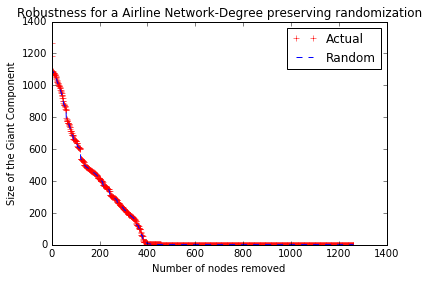

In [77]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, 'r+', label="Actual") 
plt.plot(Gc_pre, 'b--', label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for a Airline Network-Degree preserving randomization") 
plt.legend()

In [88]:
#generating GNM graph
G_gnm_c=G.copy()
G_gnm=nx.gnm_random_graph(len(G_gnm_c), G.number_of_edges(), seed=23, directed=False)
averagedegree_gnm=G_gnm.size()*2/len(G_gnm)
print "average degree of GNM :", averagedegree_gnm

average degree of GNM : 74.9817893903


In [79]:
G_gnm1=G_gnm.copy()
Gc_gnm_d=degree_robust(G_gnm1)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


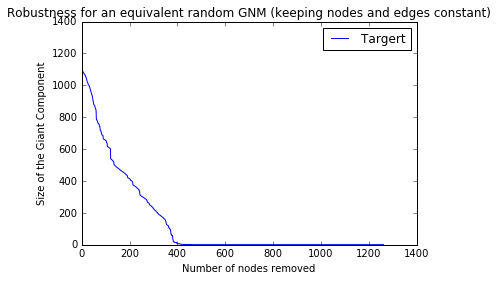

In [80]:
#ploting the robustness graph for targeted  and random attack based on degree
#plt.plot(Gc_gnm_d, label="Actual") 
plt.plot(Gc_gnm_d, label="Targert") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for an equivalent random GNM (keeping nodes and edges constant)") 
plt.legend()

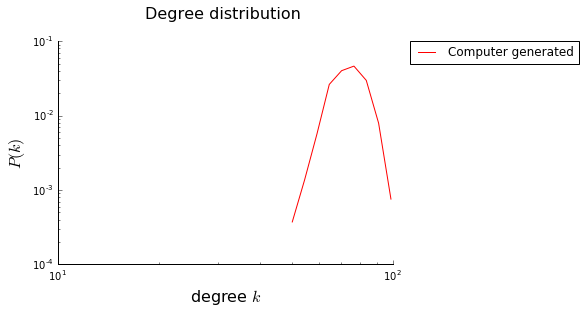

In [81]:
#ploting degree distribution of GNM model

degrees_rand= list(G_gnm.degree().values())
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)
fig2 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x1, density_rand, 'r', label='Computer generated') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n',fontsize=16)
plt.show()

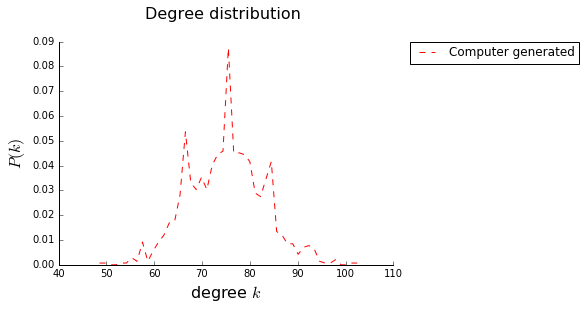

In [39]:
degrees_rand= list(G_gnm.degree().values())
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.linspace(kmin,kmax, num=50)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)
fig2 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x1, density_rand, 'r--', label='Computer generated') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n',fontsize=16)
plt.show()


#degree_airport_gnm

In [82]:
#calculating clustering distribution
P=G.copy()
cls=[]
deg_cl=[]

for i in range(0,len(P)):
    a=nx.clustering(P,nodes= nodes[i],weight=None)
    cls.append(a)
    d=P.degree(nodes[i])
    deg_cl.append(d)

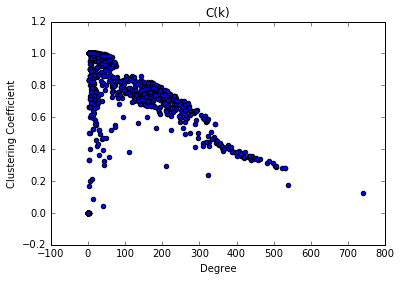

In [83]:
plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k)") 
#plt.legend()

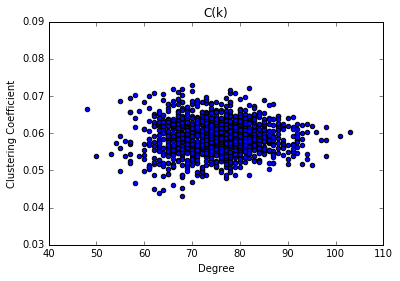

In [93]:
#calculating clustering distribution of random graph
Crand=G_gnm.copy()
cls=[]
deg_cl=[]

for i in range(0,len(Crand)):
    a=nx.clustering(Crand,nodes= i,weight=None)
    cls.append(a)
    d=Crand.degree(i)
    deg_cl.append(d)

plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k) - Random GNM model") 
#plt.legend()

#making the refined Graph
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)

In [125]:
#making the refined Graph 
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)
rem_nodes=remove_nodes[1:]

In [126]:
Ref_G=G.copy()
Ref_G.remove_nodes_from(remove_nodes)
print len(Ref_G)    
Ref_G.size()

462


35796

In [96]:
nx.write_edgelist(Ref_G, "edgelist2.txt", data=['weight'])

In [97]:
#[G.degree(node) for node in nodes]

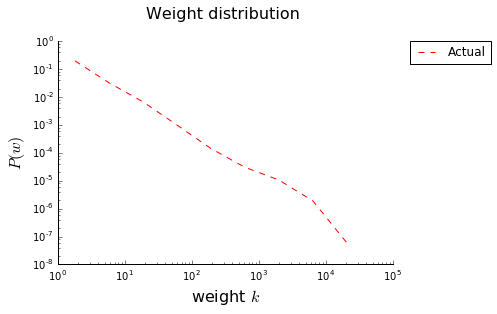

In [98]:
#Weight distribution
weight_new = [int(x) for x in weight]

#copying in the same code
degrees1 = list(weight_new)
kmin = min(degrees1)
kmax = max(degrees1)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)
fig1 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"weight $k$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Weight distribution \n',fontsize=16)
plt.show()